In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score,confusion_matrix,precision_recall_curve,roc_curve
from sklearn.preprocessing import StandardScaler, Binarizer
from sklearn.linear_model import LogisticRegression

warnings.filterwarnings("ignore")

diabetes_date = pd.read_csv("./diabetes.csv")
print(diabetes_date.Outcome.value_counts())
diabetes_date.head()

Outcome
0    500
1    268
Name: count, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
diabetes_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
diabetes_date.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [54]:
# 분류 평가 지표
def get_clf_eval(y_test, pred=None, pred_proba=None):
    from sklearn.metrics import accuracy_score,precision_score, recall_score, roc_auc_score
    from sklearn.metrics import f1_score,confusion_matrix,precision_recall_curve,roc_curve
    from sklearn.preprocessing import StandardScaler, Binarizer
    confusion = confusion_matrix(y_test, pred) 
    accuracy = accuracy_score(y_test, pred) 
    precision = precision_score(y_test, pred) 
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test,pred) 
    #ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba) 
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
 F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    
# 분류결정임계값에 따른 분류 평가지표 확인
def get_eval_by_threshold(y_test,pred_proba_c1,thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print("임계값:",custom_threshold)
        get_clf_eval(y_test,custom_predict,pred_proba_c1)

# 정밀도 재현율 곡선
def precision_recall_curve_plot(y_test,pred_proba_c1):
    precisions, recalls,thresholds = precision_recall_curve(y_test,pred_proba_c1)
    
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds,precisions[0:threshold_boundary],linestyle='--', label='precision')
    plt.plot(thresholds,recalls[0:threshold_boundary], label='recall')
    
    start,end = plt.xlim() # x값 범위 지정
    plt.xticks(np.round(np.arange(start,end,0.1),2)) # x축의 scale 단위를 변경
    
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend() # 범례추가
    plt.grid()
    plt.show()

# roc 곡선
def roc_curve_plot(y_test, pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환받음.
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1) 
    #ROC 곡선을 그래프 곡선으로 그림.
    plt.plot(fprs, tprs, label="ROC")
    # 가운데 대각선 직선을 그림.
    plt.plot([0, 1], [0, 1],'--', label="Random")
             
    # FPR X 축의 Scale을 0.1 단위로 변경, X, Y축 명 설정 등 
    start, end = plt.xlim() 
    plt.xticks(np.round(np.arange(start, end, 0.1), 2)) 
    plt.xlim(0, 1); plt.ylim(0, 1)
    plt.xlabel('FPR( 1 - Specificity )'); plt.ylabel('TPR(Recall)') 
    plt.legend()
    plt.show()

In [57]:
X = diabetes_date.iloc[:,:-1]
y = diabetes_date.iloc[:,-1]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=156,stratify=y)

# 로지스틱 회귀로 학습, 예측 및 평가 수행
lr_clf = LogisticRegression(solver="liblinear")
lr_clf.fit(X_train,y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,-1]

get_clf_eval(y_test,pred,pred_proba)

오차 행렬
[[87 13]
 [22 32]]
정확도: 0.7727, 정밀도: 0.7111, 재현율: 0.5926, F1: 0.6465, AUC:0.8083


findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


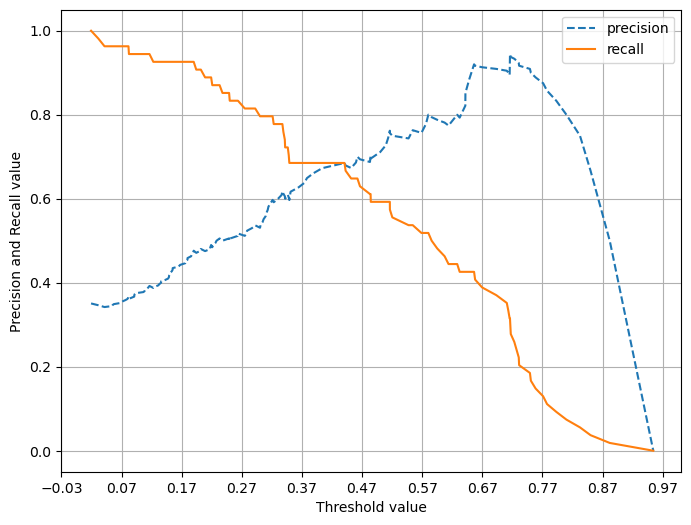

In [17]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:,1]
precision_recall_curve_plot(y_test,pred_proba_c1)

In [18]:
diabetes_date.describe()
# 0값이 확인됨

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


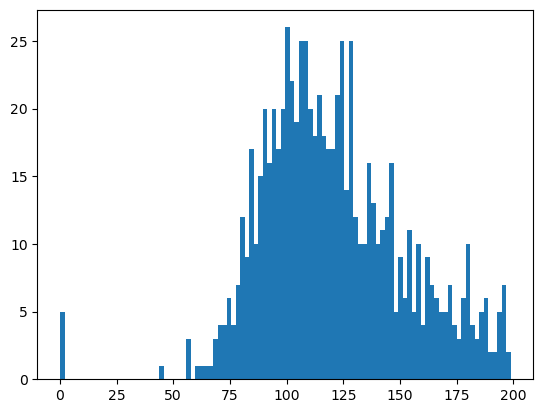

In [21]:
plt.hist(diabetes_date['Glucose'],bins=100)
plt.show()

In [24]:
# 0값 건수 및 전체 대비 비율
zero_features = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]

total_count = diabetes_date['Glucose'].count()

for feature in zero_features:
    zero_count = diabetes_date[diabetes_date[feature]==0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f} %'.format(feature,zero_count,100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트는 0.65 %
BloodPressure 0 건수는 35, 퍼센트는 4.56 %
SkinThickness 0 건수는 227, 퍼센트는 29.56 %
Insulin 0 건수는 374, 퍼센트는 48.70 %
BMI 0 건수는 11, 퍼센트는 1.43 %


SKinThickness와 Insulin의 0 값은 전체에서 차지하는 비율이 높기 때무에 일괄적으로 삭제하는 것은 바람직하지 않음

In [27]:
# zero_features 리스트 내부에 저장된 개별 피처들에 대해서 0값을 평균 값으로 대체
# 각 컬럼별 평균 값을 replace를 통해 교체 가능
mean_zero_features = diabetes_date[zero_features].mean()
diabetes_date[zero_features] = diabetes_date[zero_features].replace(0,mean_zero_features)

In [66]:
X = diabetes_date.iloc[:,:-1]
y = diabetes_date.iloc[:,-1]

# 로지스틱 회귀는 데이터가 가우시안 분포를 가지고 있다고 가정
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=156,stratify=y)

lr_clf = LogisticRegression(solver="liblinear")
lr_clf.fit(X_train,y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test,pred,pred_proba)

오차 행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111, F1: 0.6804, AUC:0.8059


In [67]:
thresholds = [0.3,0.33,0.36,0.39,0.42,0.45,0.48,0.5]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1),thresholds)

임계값: 0.3
오차 행렬
[[68 32]
 [13 41]]
정확도: 0.7078, 정밀도: 0.5616, 재현율: 0.7593, F1: 0.6457, AUC:0.8059
임계값: 0.33
오차 행렬
[[74 26]
 [15 39]]
정확도: 0.7338, 정밀도: 0.6000, 재현율: 0.7222, F1: 0.6555, AUC:0.8059
임계값: 0.36
오차 행렬
[[76 24]
 [18 36]]
정확도: 0.7273, 정밀도: 0.6000, 재현율: 0.6667, F1: 0.6316, AUC:0.8059
임계값: 0.39
오차 행렬
[[79 21]
 [19 35]]
정확도: 0.7403, 정밀도: 0.6250, 재현율: 0.6481, F1: 0.6364, AUC:0.8059
임계값: 0.42
오차 행렬
[[81 19]
 [20 34]]
정확도: 0.7468, 정밀도: 0.6415, 재현율: 0.6296, F1: 0.6355, AUC:0.8059
임계값: 0.45
오차 행렬
[[85 15]
 [20 34]]
정확도: 0.7727, 정밀도: 0.6939, 재현율: 0.6296, F1: 0.6602, AUC:0.8059
임계값: 0.48
오차 행렬
[[88 12]
 [21 33]]
정확도: 0.7857, 정밀도: 0.7333, 재현율: 0.6111, F1: 0.6667, AUC:0.8059
임계값: 0.5
오차 행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111, F1: 0.6804, AUC:0.8059


In [68]:
binarizer = Binarizer(threshold=0.48)
pred_th_048 = binarizer.fit_transform(pred_proba[:,1].reshape(-1,1))

get_clf_eval(y_test,pred_th_048,pred_proba[:,1])

오차 행렬
[[88 12]
 [21 33]]
정확도: 0.7857, 정밀도: 0.7333, 재현율: 0.6111, F1: 0.6667, AUC:0.8059


In [65]:
pred_proba

array([0.0050662 , 0.19078324, 0.13315681, 0.55569285, 0.03352927,
       0.72874778, 0.82997075, 0.14932544, 0.17038765, 0.11277607,
       0.69337599, 0.46383968, 0.0456937 , 0.39465543, 0.2425751 ,
       0.09051856, 0.78072871, 0.19137002, 0.01654562, 0.79716262,
       0.42837299, 0.32850869, 0.05311701, 0.30588297, 0.28977835,
       0.10631804, 0.91707487, 0.75349365, 0.18420777, 0.88804531,
       0.19887509, 0.22096444, 0.1142337 , 0.16204273, 0.10839596,
       0.71843899, 0.22416802, 0.43522384, 0.84347292, 0.67783055,
       0.44387035, 0.26061201, 0.70017461, 0.13975146, 0.35177478,
       0.0198151 , 0.68984428, 0.0860875 , 0.5130884 , 0.30086502,
       0.28836211, 0.91333309, 0.89286387, 0.05868155, 0.13928784,
       0.37785524, 0.07477822, 0.37808397, 0.33077705, 0.41917814,
       0.17502616, 0.81636724, 0.32063434, 0.64630775, 0.2855275 ,
       0.0933899 , 0.23460507, 0.73228233, 0.14490675, 0.78387843,
       0.05968644, 0.33104091, 0.11463611, 0.44506076, 0.77036